Sources
* https://jhrcook.github.io/spotify-data-analysis/10_005_analyzing-my-streaming-history.html
* https://strftime.org/

In [1]:
# %pip install pandas numpy matplotlib seaborn rapidfuzz statsmodels

In [2]:
# Import Statements and Global configurations
import os
from typing import cast, Literal
from pprint import pp
from datetime import datetime

import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator, StrMethodFormatter

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.expand_frame_repr", False)

from preprocessing import read_file, extract_filtered, SongAttributes
from utils.fuzzy_searchers import *
from utils.plots import Plots
from utils.filters import Filters
from utils.smoothen import *
from utils.series_textwrap import *

In [3]:
from utils.process_zip import process_zip

zip_path = "./my_spotify_data.zip"
filters: list[SongAttributes] = ["ts", "ms_played", "master_metadata_track_name", "master_metadata_album_artist_name", "master_metadata_album_album_name", "spotify_track_uri"]

compiled_json_path = process_zip(zip_path, filters)
df = pd.read_json(compiled_json_path)

# Converting the ts column to datetime object
df["ts"] = pd.to_datetime(df["ts"])

Filename my_spotify_data
zip_extract_path='./my_spotify_data'
Contents at ./my_spotify_data are  ['Spotify Extended Streaming History']
Files found: ./my_spotify_data/Spotify Extended Streaming History/Streaming_History_Audio_2021-2025.json


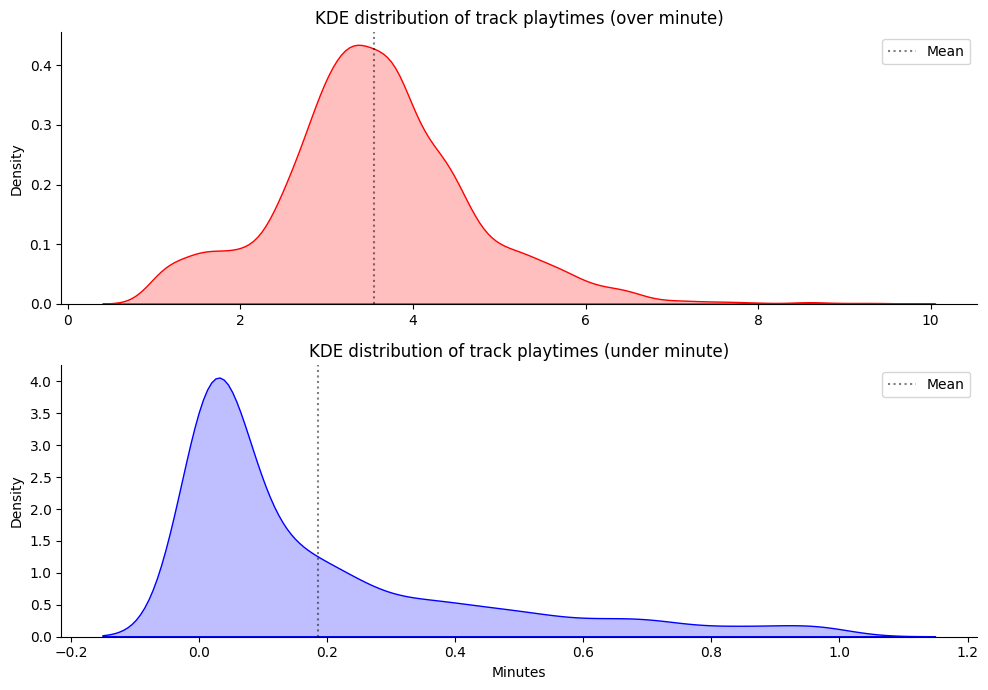

In [4]:
# filled Line plot ?? 
Plots.track_playtime_kde_dist(df)

In [5]:
df.head(5)

ts  ms_played master_metadata_track_name master_metadata_album_artist_name master_metadata_album_album_name                     spotify_track_uri
0 2021-08-11 09:22:28+00:00          0            Loveeeeeee Song                           Rihanna            Unapologetic - Deluxe  spotify:track:5Mk1tgVrSuoWWwPVFNS0jB
1 2021-08-11 09:26:45+00:00     256186            Loveeeeeee Song                           Rihanna            Unapologetic - Deluxe  spotify:track:5Mk1tgVrSuoWWwPVFNS0jB
2 2021-08-11 09:26:45+00:00     256186            Loveeeeeee Song                           Rihanna            Unapologetic - Deluxe  spotify:track:5Mk1tgVrSuoWWwPVFNS0jB
3 2021-08-11 09:30:32+00:00     226955                    Streets                          Doja Cat                         Hot Pink  spotify:track:60ynsPSSKe6O3sfwRnIBRf
4 2021-08-11 09:34:15+00:00     222437             Feel Good Inc.                          Gorillaz                       Demon Days  spotify:track:0d28khcov6AiegSCpG5TuT

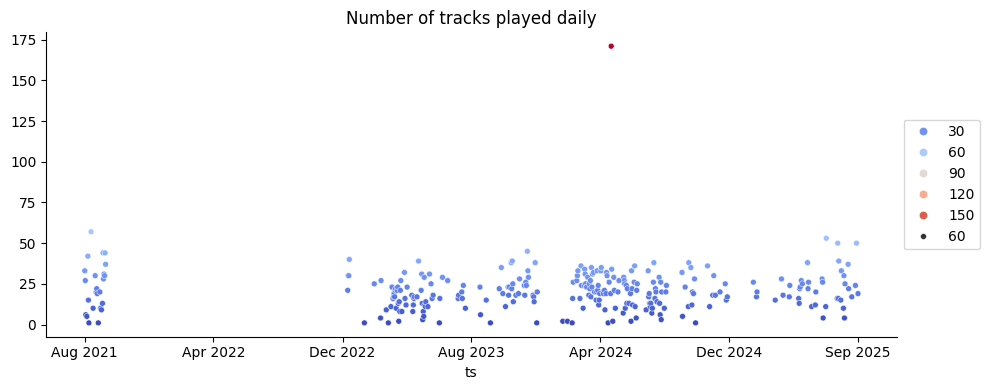

In [6]:
# Scatter plot
Plots.daily_tracks_graph(df)

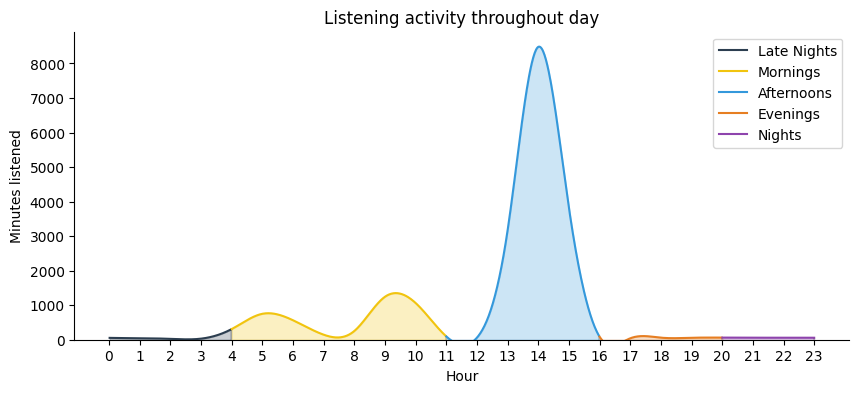

In [7]:
Plots.daily_listening_activity(df)
plt.show()

In [8]:
cpy = df.copy(True)
cpy["hour"] = df.ts.dt.hour
cpy.groupby("hour").size() # number of tracks listended in that particular hour, not the number of minutes listendh
# minutes listened in a particular hour
cpy.head()
cpy.groupby("hour")["ms_played"].sum()
# select hour, sum(ms_played / 60000) from df group by hour

hour
0       3239807
1       2591682
2       1535384
3       1834552
4      18417164
5      45010016
6      33903193
7       8807366
8      15062580
9      74554855
10     63882631
11      5829950
12      3461028
13    189441425
14    508721091
15    229707375
16      5381519
17      2433257
18      3576084
19      3402497
20      3690175
21      3493010
22      3570085
23      3452331
Name: ms_played, dtype: int64

In [9]:
cpy.ts.dt.to_period("M")

/tmp/ipykernel_430308/237490489.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cpy.ts.dt.to_period("M")


0       2021-08
1       2021-08
2       2021-08
3       2021-08
4       2021-08
         ...   
7985    2025-09
7986    2025-09
7987    2025-09
7988    2025-09
7989    2025-09
Name: ts, Length: 7990, dtype: period[M]

DatetimeIndex(['2021-08-31', '2022-02-28', '2022-08-31', '2023-02-28',
               '2023-08-31', '2024-02-29', '2024-08-31', '2025-02-28',
               '2025-08-31'],
              dtype='datetime64[ns]', freq='6ME')


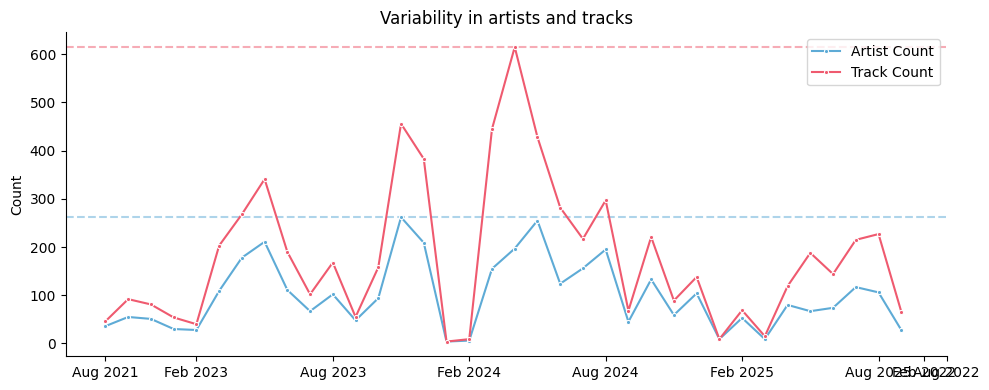

In [10]:
# Multi line plot
Plots.variability_in_artists_and_tracks(df)

In [11]:
Plots.top_n_artists_by_playtime(df, 50)

In [12]:
copy = df.copy(True)

In [13]:
copy["month"] = pd.to_datetime(copy["ts"]).apply(lambda ts: datetime.strftime(ts,"%b"))
may = copy[copy["month"] == "May"].copy(True)

In [14]:
may["date"] = pd.to_datetime(copy["ts"]).apply(lambda ts: datetime.strftime(ts,"%d"))

In [15]:
grouped = may.groupby("date").count().sort_values('ts', ascending=False)
grouped["ts"]

date
18    200
14    107
25     86
20     67
19     65
31     45
05     44
30     44
26     41
23     37
09     33
06     31
10     30
17     30
16     29
24     28
03     28
15     23
28     22
01     22
02     22
21     21
08     19
11     17
13     16
04     15
27     11
22      5
12      1
Name: ts, dtype: int64

In [16]:
len(df[df["ms_played"] > 0])

7830

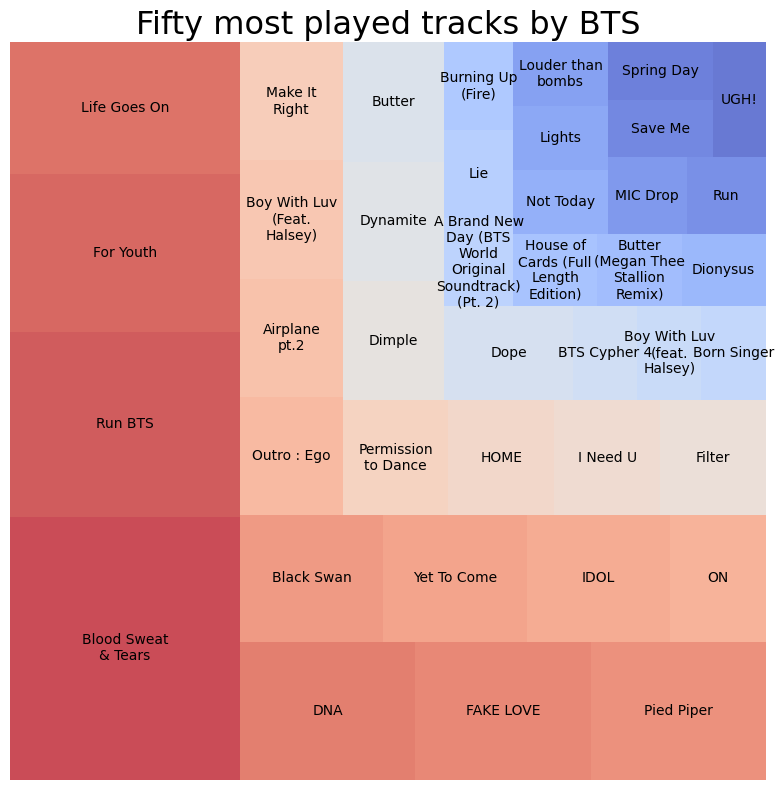

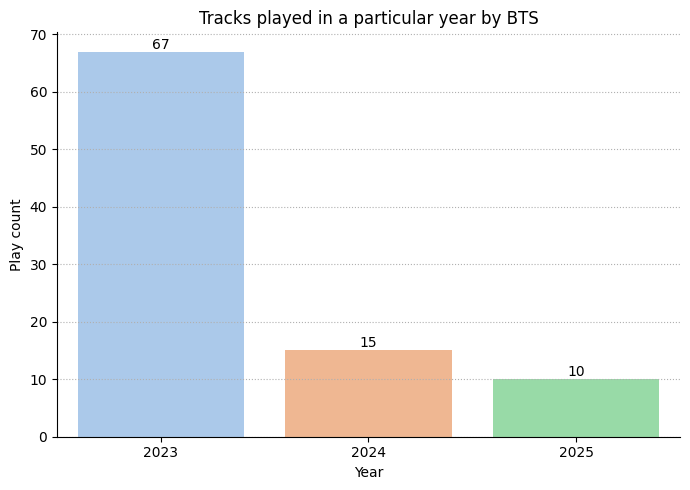

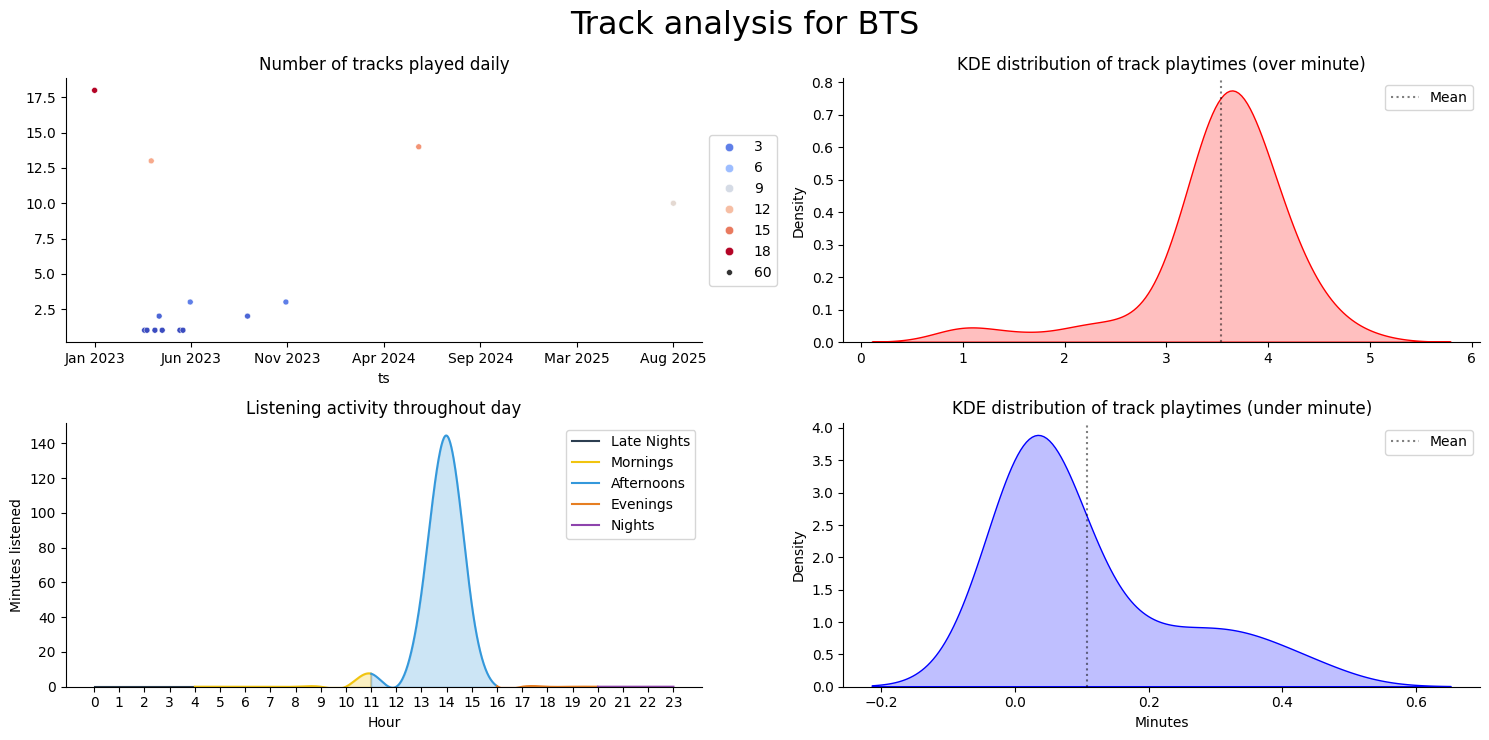

In [17]:
Plots.analysis_per_artist(df, "BTS")


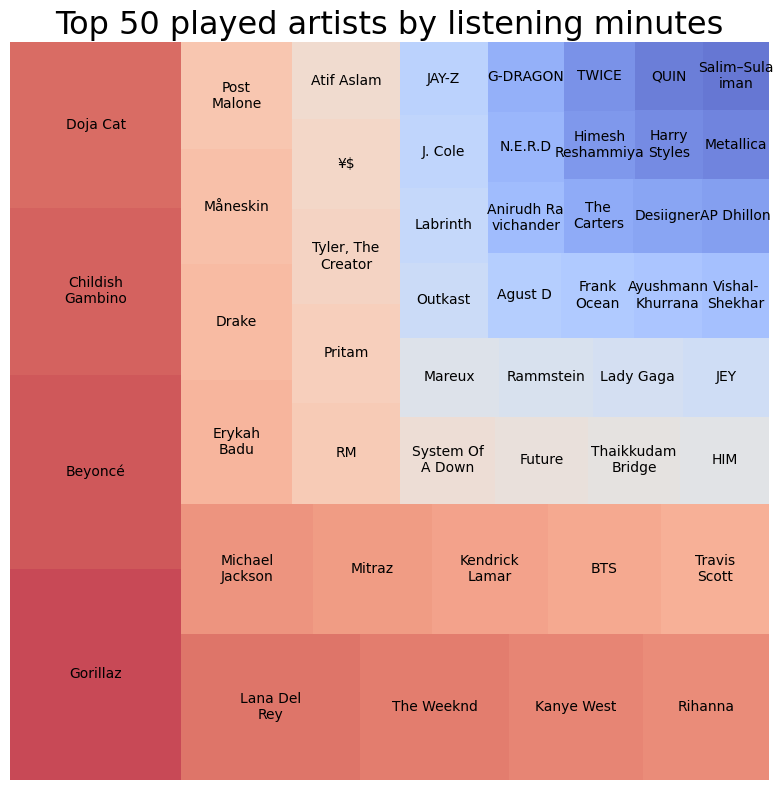

In [18]:
Plots.top_n_artists_by_playtime(df, 50)

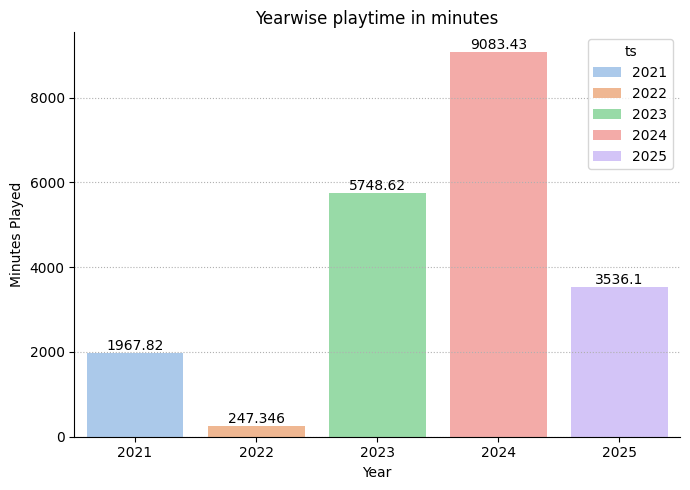

In [19]:
Plots.yearwise_listening_minutes(df)